## widgets.py

In [1]:
import vectorbt as vbt
from vectorbt.utils import *

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
ts = pd.DataFrame({
    'a': np.random.randint(5, size=5), 
    'b': np.random.randint(5, size=5)}, index=pd.Index([
    datetime(2020, 1, 1),
    datetime(2020, 1, 2),
    datetime(2020, 1, 3),
    datetime(2020, 1, 4),
    datetime(2020, 1, 5)
])).astype(np.float64)
print(ts)

              a    b
2020-01-01  0.0  1.0
2020-01-02  2.0  4.0
2020-01-03  0.0  1.0
2020-01-04  1.0  4.0
2020-01-05  2.0  3.0


In [4]:
big_ts = pd.DataFrame(np.random.uniform(size=(100, 100)).astype(float))
big_ts.columns = list(map(str, big_ts.columns))
big_ts.index = [datetime(2018, 1, 1) + timedelta(days=i) for i in range(100)]
print(big_ts.shape)

(100, 100)


## Gauge

In [5]:
gauge_fig = vbt.Gauge(value=0)
gauge_fig

Gauge({
    'data': [{'domain': {'x': [0, 1], 'y': [0, 1]},
              'gauge': {'axis': {'range': [0, 0]},…

In [6]:
gauge_fig.update_data(1)
gauge_fig.update_data(0.5)

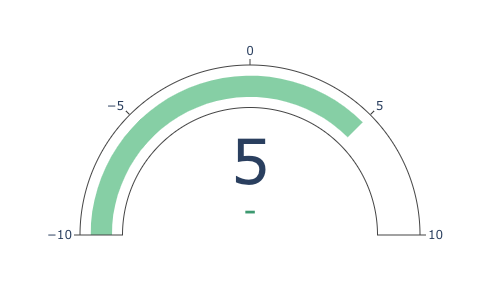

In [7]:
vbt.Gauge(value=5, value_range=(-10, 10)).show_png()

In [8]:
big_fig = vbt.Gauge(value=0)

%timeit vbt.Gauge(value=0)
%timeit big_fig.update_data(0)

del big_fig

190 ms ± 41.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
471 µs ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Bar

In [9]:
bar_fig = pd.DataFrame(ts).vbt.Bar()
bar_fig

Bar({
    'data': [{'name': 'a',
              'type': 'bar',
              'uid': '975d7aa4-a5aa-475a-808c-34…

In [10]:
bar_fig.update_data(ts.values * 2)

In [11]:
pd.DataFrame(ts).vbt.Bar(trace_kwargs=[dict(name='hello'), dict(name='world')], barmode='relative')

Bar({
    'data': [{'name': 'hello',
              'type': 'bar',
              'uid': '206628cb-d01c-47ca-aaf…

In [12]:
%timeit pd.DataFrame(big_ts).vbt.Bar()

big_fig = pd.DataFrame(big_ts).vbt.Bar()
%timeit big_fig.update_data(big_ts.values * 2)

del big_fig

2.9 s ± 611 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.02 ms ± 390 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Scatter

In [13]:
scatter_fig = pd.DataFrame(ts).vbt.Scatter()
scatter_fig

Scatter({
    'data': [{'name': 'a',
              'type': 'scatter',
              'uid': '457fb078-c4d4-4f8e…

In [14]:
scatter_fig.update_data(ts.values * 2)

In [15]:
%timeit pd.DataFrame(big_ts).vbt.Scatter()

big_fig = pd.DataFrame(big_ts).vbt.Scatter()
%timeit big_fig.update_data(big_ts.values * 2)

del big_fig

3.27 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.76 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Histogram

In [16]:
hist_fig = pd.DataFrame(ts).vbt.Histogram()
hist_fig

Histogram({
    'data': [{'name': 'a',
              'opacity': 0.75,
              'type': 'histogram',
     …

In [17]:
hist_fig.update_data(ts.values * 2)

In [18]:
pd.DataFrame(ts).vbt.Histogram(horizontal=True)

Histogram({
    'data': [{'name': 'a',
              'opacity': 0.75,
              'type': 'histogram',
     …

In [19]:
%timeit pd.DataFrame(big_ts).vbt.Histogram()

big_fig = pd.DataFrame(big_ts).vbt.Histogram()
%timeit big_fig.update_data(big_ts.values * 2)

del big_fig

2.3 s ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.04 ms ± 869 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Heatmap

In [20]:
heatmap_fig = pd.DataFrame(ts).vbt.Heatmap()
heatmap_fig

Heatmap({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                    …

In [21]:
heatmap_fig.update_data(ts.values * 2)

In [22]:
pd.DataFrame(ts).vbt.Heatmap(horizontal=True)

Heatmap({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                    …

In [23]:
%timeit pd.DataFrame(big_ts).vbt.Heatmap()

big_fig = pd.DataFrame(big_ts).vbt.Heatmap()
%timeit big_fig.update_data(big_ts.values * 2)

del big_fig

373 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
209 µs ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
